## File EDA.py which include a lot of functions for this programe, users need to run file EDA.py first in order to use the functions from the file.

In [1]:
%run EDA.py

## Import neccessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## READ FILE EXCEL

## Users need to replace the name of the excel file in the program below to read the excel file.

## df is a dataframe which contain all data of excel file

In [3]:
df = pd.read_excel('22624 KCH FINAL DOWNLOAD DiFG.xlsx') # rename your excel file here
df

,Create a code for each comment (FF_001),Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?
0,NaN,Ensure public library provides the same servic...
1,NaN,Carbon footprint. Scamming political climate. ...
2,NaN,I would like the team to consider missing out ...
3,NaN,No
4,NaN,NaN
...,...,...
415,NaN,NaN
416,NaN,Don’t add kirklees to any building.
417,NaN,Don’t design them anything like the disgracefu...
418,NaN,Don’t plaster the horrible name kirklees on an...


## Replace the name of the columm "*Create a code for each comment (FF_001)*" into "*Comment_ID*"

In [4]:
df.rename(columns={"Create a code for each comment (FF_001)": "Comment_ID"}, inplace=True)


## Replace the name of the columm "*Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?*" into "*Recommendations*"

In [5]:
df.rename(columns={"Is there anything else that you would like the team to consider as they continue to develop the design of the buildings and public spaces?": "Recommendations"}, inplace=True)


## To check how many responses from surveyers, you can call function count_missing_values from the file EDA.py

In [6]:
count_missing_values_1(df)

,Missing,Non-Missing
Comment_ID,420,0
Recommendations,137,283


## Generate the code values with format FF001


In [7]:
df['Comment_ID'] = df.index.map(lambda x: f"FF{x+1:03d}")

In [8]:
df

,Comment_ID,Recommendations
0,FF001,Ensure public library provides the same servic...
1,FF002,Carbon footprint. Scamming political climate. ...
2,FF003,I would like the team to consider missing out ...
3,FF004,No
4,FF005,NaN
...,...,...
415,FF416,NaN
416,FF417,Don’t add kirklees to any building.
417,FF418,Don’t design them anything like the disgracefu...
418,FF419,Don’t plaster the horrible name kirklees on an...


## We need to remove null values which are empty cells and responses with "No"

In [9]:
df_1 = df.dropna(subset=['Recommendations'])

# Define the list of responses to remove
no_responses = ['NO', 'NO.','No','No.','no', 'no.']

# Remove rows with matching responses
df_1 = df_1[~df_1['Recommendations'].isin(no_responses)]


In [10]:
# Print the updated dataframe
df_1

,Comment_ID,Recommendations
0,FF001,Ensure public library provides the same servic...
1,FF002,Carbon footprint. Scamming political climate. ...
2,FF003,I would like the team to consider missing out ...
5,FF006,Covered outdoor space for concerts and getting...
6,FF007,You really need to find a way to address the c...
...,...,...
414,FF415,Remove the Green space Huddersfield has Three ...
416,FF417,Don’t add kirklees to any building.
417,FF418,Don’t design them anything like the disgracefu...
418,FF419,Don’t plaster the horrible name kirklees on an...


## As we cannot see all recommendations of from dataframe, so we need extract the values of the column of recommendations into a list to see them all.


In [11]:
recommendations_list = df_1["Recommendations"].tolist()
recommendations_list

['Ensure public library provides the same service. The library service is not just about lending books',
 'Carbon footprint. Scamming political climate. Dismissal of deep any affections for what is good to assign a global commons.',
 "I would like the team to consider missing out the museum. I would, ideally, like the team to consider building something that would be Huddersfield's answer to Tropical World (without the animals). Tropical World in Roundhay Park, Leeds is a place where people are reminded of the importance of preserving the natural world. It adds to the usual themes of eating, drinking and consuming. This could be a leisure destination for anybody interested in conservation/wildlife/the future of the planet. It could serve vegan food. It could be very eco-friendly - compostable cups, plastic free, responsibly sourced food. Businesses that are carbon neutral could be encouraged. It could be a green destination. I think we need to lead by example and inspire people to do m

# Generating wordcloud for recommendations. 

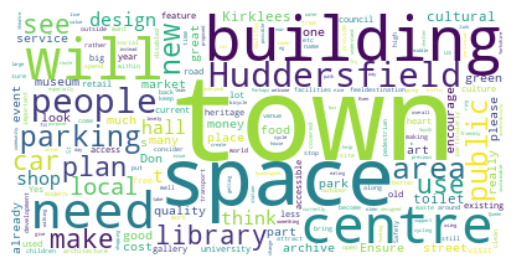

In [12]:
generate_wordcloud_8(df_1, 'Recommendations')


##  Below are the keywords from the dataset in ascending order. Users need to specify a few keywords from here. 

In [13]:
create_word_frequency_table_9(recommendations_list)

Word Frequency Table:
town: 108
centre: 51
huddersfield: 48
buildings: 48
people: 46
space: 43
would: 38
need: 36
like: 33
spaces: 32
public: 31
parking: 31
new: 30
library: 24
see: 24
local: 23
area: 22
think: 21
plans: 21
make: 21
use: 20
cultural: 20
kirklees: 20
hall: 20
building: 19
toilets: 19
money: 18
also: 18
design: 18
good: 17
could: 17
please: 17
quality: 17
areas: 16
get: 16
park: 15
much: 15
many: 15
market: 15
ensure: 14
car: 14
already: 14
shops: 14
museum: 13
green: 13
archive: 13
art: 13
great: 13
encourage: 13
street: 13
food: 12
really: 12
part: 12
current: 12
needs: 12
free: 11
used: 11
gallery: 11
council: 11
events: 11
look: 11
university: 11
heritage: 11
service: 10
place: 10
yes: 10
existing: 10
cost: 10
visit: 10
years: 10
access: 10
accessible: 10
heart: 10
retail: 10
features: 10
old: 10
architecture: 10
around: 10
consider: 9
attract: 9
outside: 9
less: 9
well: 9
big: 9
back: 9
open: 9
transport: 9
facilities: 9
put: 9
cars: 9
destination: 8
feel: 8
bring: 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Use function split_sentences from file EDA.py to split recommendations having more than one sentence

## Comment_ID with more than 1 sentence of a recommendation will be assigned with a sequence number accordingly. 

## Comment_ID with 1 sentence of a recommendation will be added with 00.

In [14]:
new_df = split_sentences_3(df_1, 'Recommendations')

# Print the new dataframe
new_df


,Comment_ID,Recommendations
0,FF00101,Ensure public library provides the same service.
1,FF00102,The library service is not just about lending ...
2,FF00201,Carbon footprint.
3,FF00202,Scamming political climate.
4,FF00203,Dismissal of deep any affections for what is g...
...,...,...
542,FF26800,Remove the Green space Huddersfield has Three ...
543,FF26900,Don’t add kirklees to any building.
544,FF27000,Don’t design them anything like the disgracefu...
545,FF27100,Don’t plaster the horrible name kirklees on an...


## You can replace 'financing|investment|money|capital|monetary|fund|cost|Wider Kirklees' as the topic you want

In [15]:
new_df_financing = new_df[new_df['Recommendations'].str.contains('financing|investment|money|capital|monetary|fund|cost|Wider Kirklees', case=False)]
new_df_financing


,Comment_ID,Recommendations
21,FF00900,Think about the cost
24,FF01200,Don't waste money on areas that won't be used ...
47,FF02205,If not what will the additional cost be of bri...
56,FF02402,These would cost much less than the proposals ...
68,FF02706,If not give the money to the police to make to...
75,FF03002,The entire town has become down at heel and vi...
77,FF03102,The development can help define or be a clear ...
88,FF03604,We need more high value housing in the very ce...
89,FF03605,Instead of big grandiose public buildings whic...
123,FF04323,I hope that taken forward that creative and we...


## Remove # in the second line to view all recommendations.

In [16]:
recommendations_financing = new_df_financing["Recommendations"].tolist()
#recommendations_financing

## You can change the lable "financing's commentors" for pie chart and bar chart 

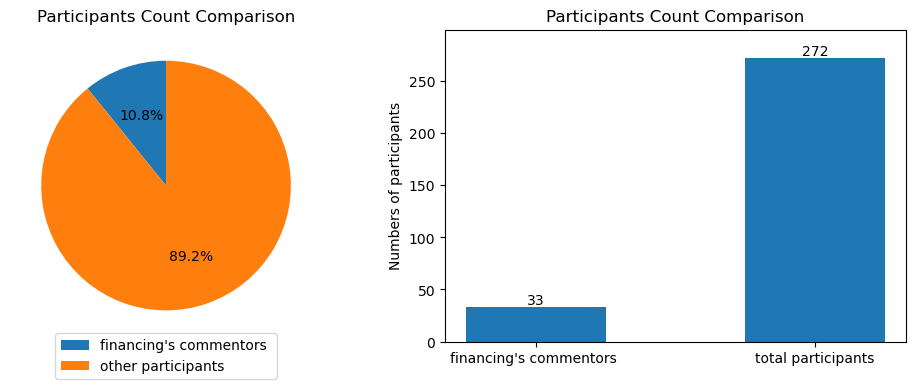

In [17]:
plot_observation_count_5(new_df_financing, df_1, "financing's commentors ")


## You can have similar changes with other topics

In [18]:
new_df_building_design = new_df[new_df['Recommendations'].str.contains('layout|design|building|architectural|structure|floor|integration|schemes|water|environmental|effect|sustainability|sight|lines', case=False)]
#new_df_building_design


In [19]:
recommendations_building_design = new_df_building_design["Recommendations"].tolist()
#recommendations_building_design

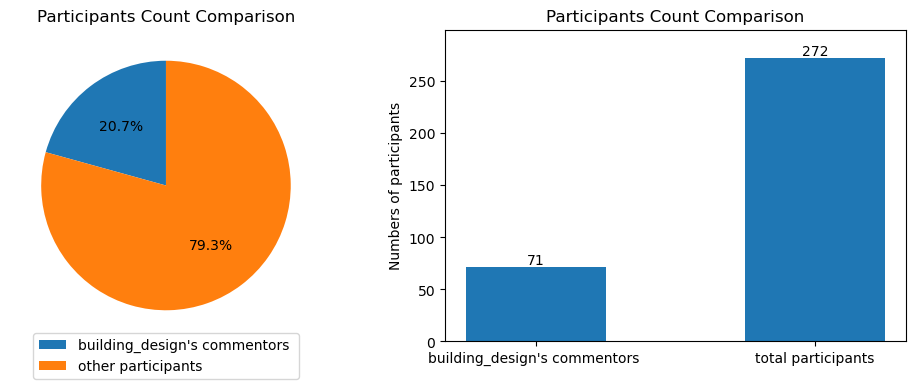

In [20]:
plot_observation_count_5(new_df_building_design, df_1, "building_design's commentors ")


In [21]:
new_df_heritage_culture = new_df[new_df['Recommendations'].str.contains('Heritage|Culture|tradition|legacy|historical|importance|ancestral|customs|modern|stone|community|space|art|music|Yorkshire', case=False)]
#new_df_heritage_culture


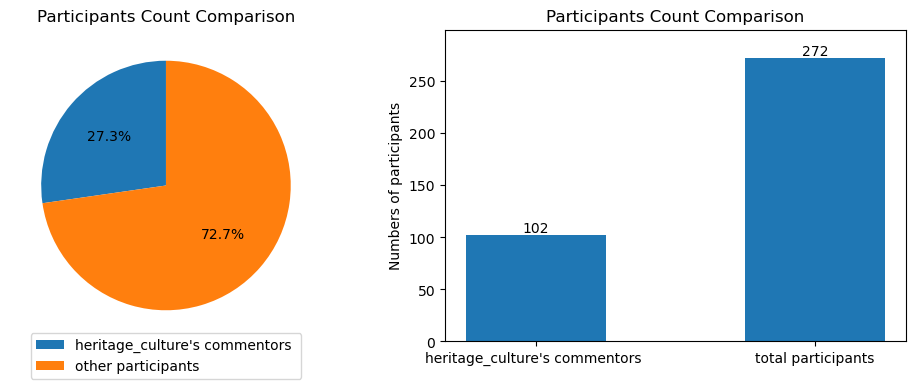

In [22]:
plot_observation_count_5(new_df_heritage_culture, df_1, "heritage_culture's commentors ")


In [23]:
new_df_demolition = new_df[new_df['Recommendations'].str.contains('demolition|remove|destruction|Dismantling|loss|knock|down', case=False)]
#new_df_demolition


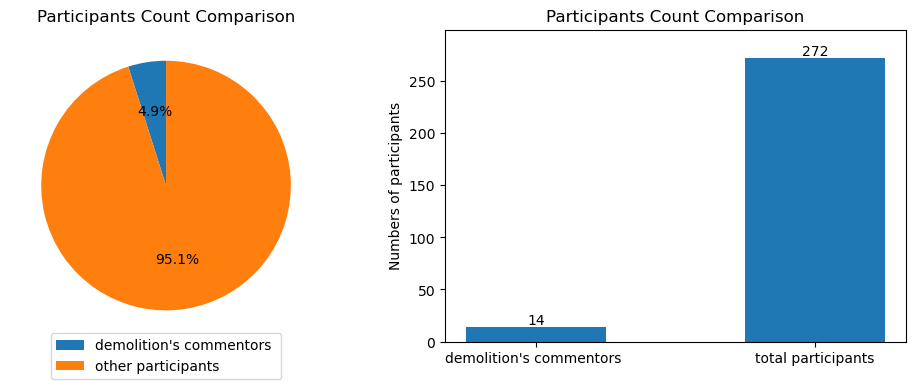

In [24]:
plot_observation_count_5(new_df_demolition, df_1, "demolition's commentors ")


In [25]:
# Create a new dataframe with rows containing the word "library"
new_df_library = new_df[new_df['Recommendations'].str.contains("library|book|reading|information|Knowledge", case=False)]
#new_df_library


In [26]:
recommendations_library = new_df_library["Recommendations"].tolist()


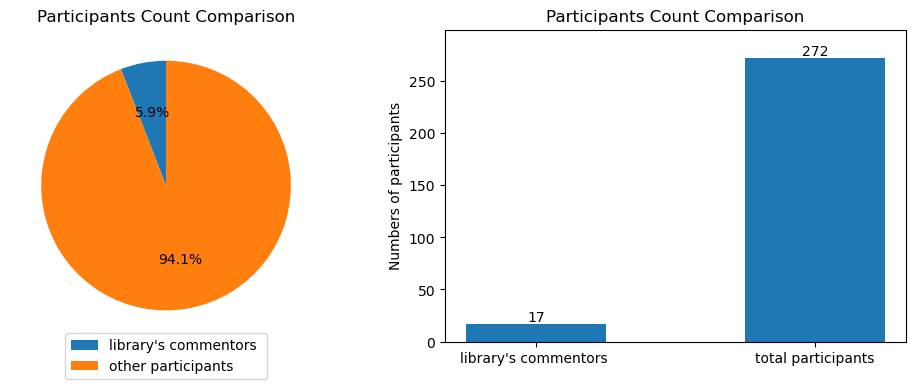

In [27]:
plot_observation_count_5(new_df_library, df_1, "library's commentors ")


In [28]:
new_df_food_hall = new_df[new_df['Recommendations'].str.contains('food|restaurant|Market|dining|eat|drink|Gastronomy', case=False)]
#new_df_food_hall


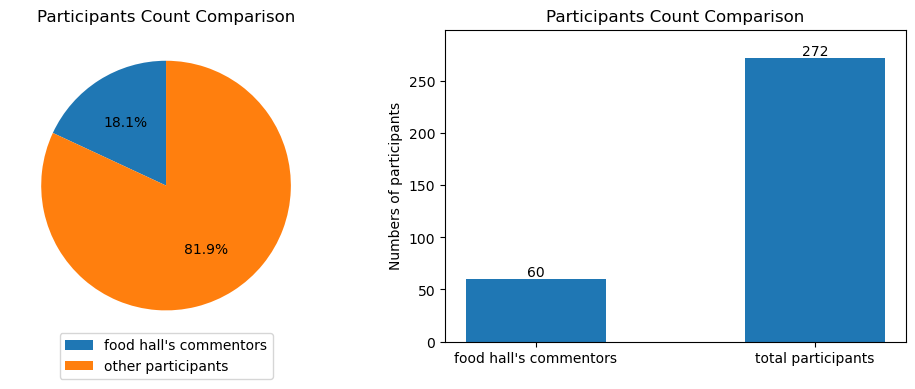

In [29]:
plot_observation_count_5(new_df_food_hall, df_1, "food hall's commentors")


In [30]:
new_df_museum_art = new_df[new_df['Recommendations'].str.contains('museum|Gallery|Exhibition|Cultural|Art|Historical|Collection', case=False)]
#new_df_museum_art


In [31]:
recommendations_museum_art = new_df_museum_art["Recommendations"].tolist()
#recommendations_museum_art


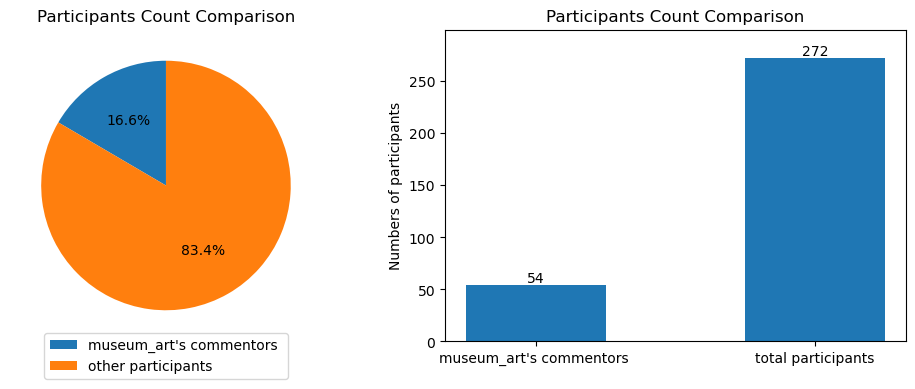

In [32]:
plot_observation_count_5(new_df_museum_art, df_1, "museum_art's commentors ")


In [33]:
new_df_museum = new_df[new_df['Recommendations'].str.contains('museum|history', case=False)]
#new_df_museum


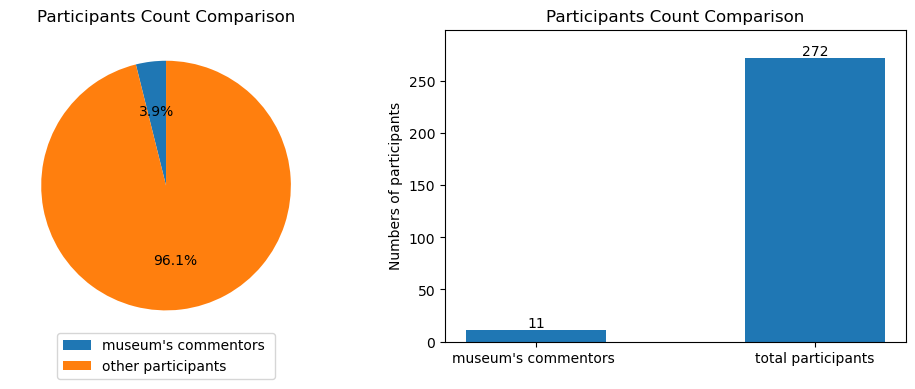

In [34]:
plot_observation_count_5(new_df_museum, df_1, "museum's commentors ")


In [35]:
new_df_art_gallery = new_df[new_df['Recommendations'].str.contains('art|gallery', case=False)]
#new_df_art_gallery


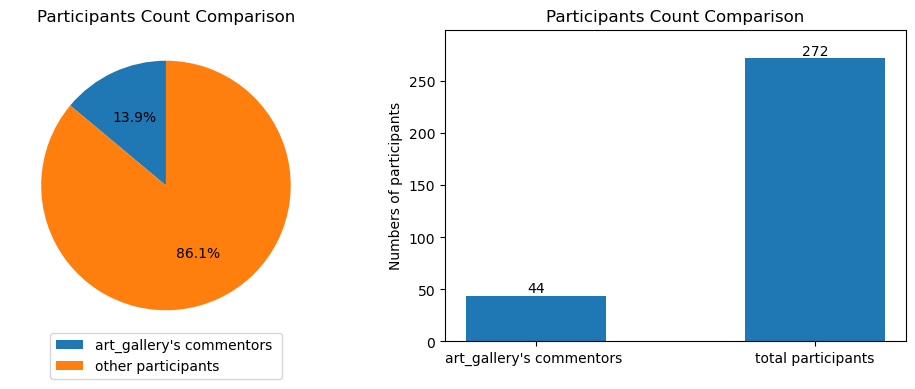

In [36]:
plot_observation_count_5(new_df_art_gallery, df_1, "art_gallery's commentors ")


In [37]:
new_df_multi_person = new_df[new_df['Recommendations'].str.contains('Event|Gathering|Social|venue|Meeting|Assembly', case=False)]
#new_df_multi_person


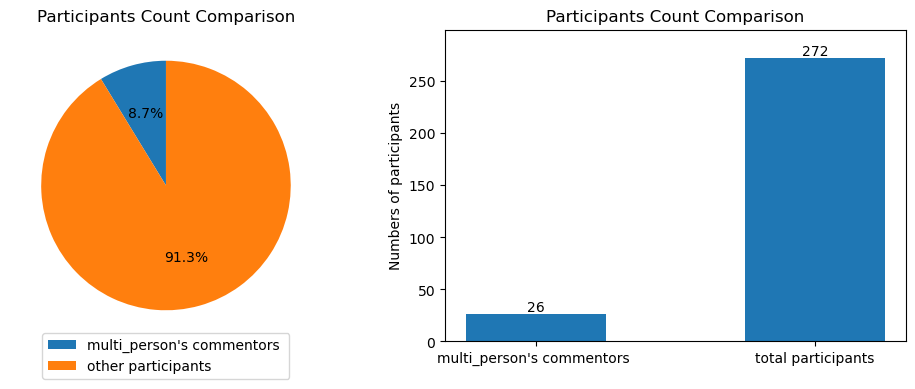

In [38]:
plot_observation_count_5(new_df_multi_person, df_1, "multi_person's commentors ")


In [39]:
new_df_parking = new_df[new_df['Recommendations'].str.contains('parking|car|vehicle|storage', case=False)]
#new_df_parking


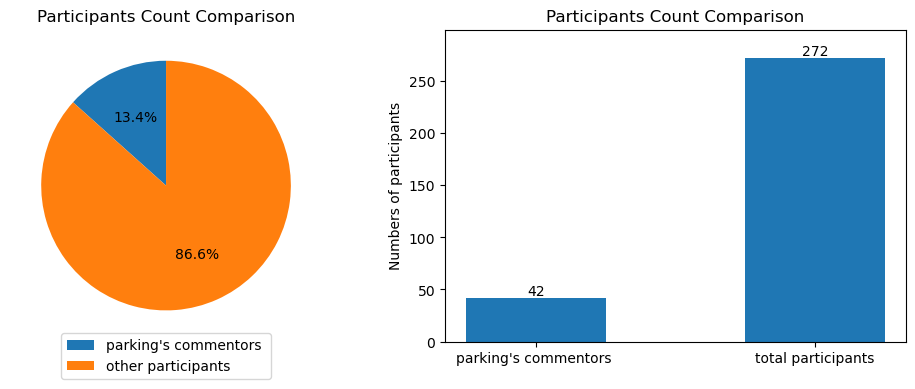

In [40]:
plot_observation_count_5(new_df_parking, df_1, "parking's commentors ")


In [41]:
new_df_outdoor  = new_df[new_df['Recommendations'].str.contains('outdoor|air|open', case=False)]
#new_df_outdoor


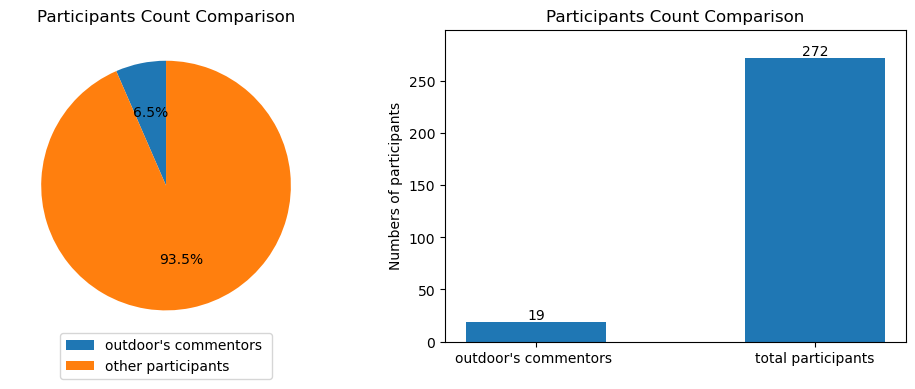

In [42]:
plot_observation_count_5(new_df_outdoor, df_1, "outdoor's commentors ")


In [43]:
new_df_safety_maintenance = new_df[new_df['Recommendations'].str.contains('Security|safety|unsafety|maintenance|Protection|Care|Upkeep', case=False)]
#new_df_safety_maintenance


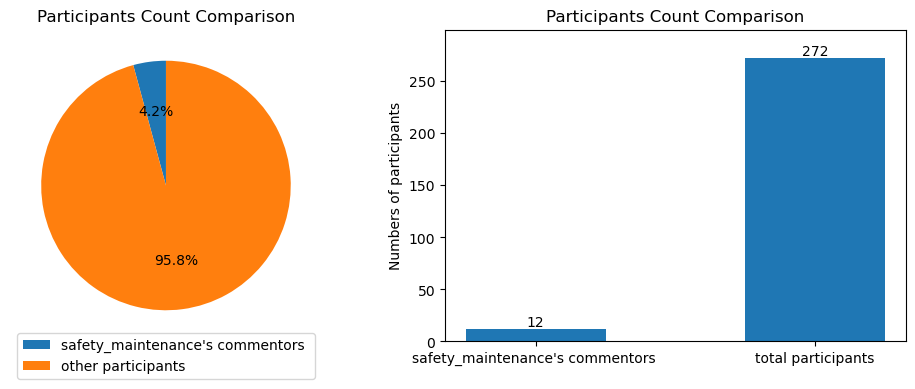

In [44]:
plot_observation_count_5(new_df_safety_maintenance, df_1, "safety_maintenance's commentors ")


In [45]:
new_df_facilities_accessibility = new_df[new_df['Recommendations'].str.contains('facilities|public|accessibility', case=False)]
#new_df_facilities_accessibility



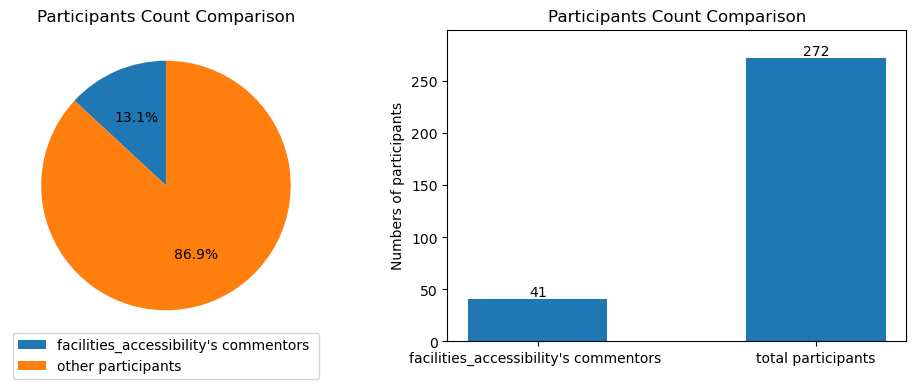

In [46]:
plot_observation_count_5(new_df_facilities_accessibility, df_1, "facilities_accessibility's commentors ")


In [47]:
new_df_travel = new_df[new_df['Recommendations'].str.contains('active|travel|Transportation|Mobility|Movement', case=False)]
#new_df_travel


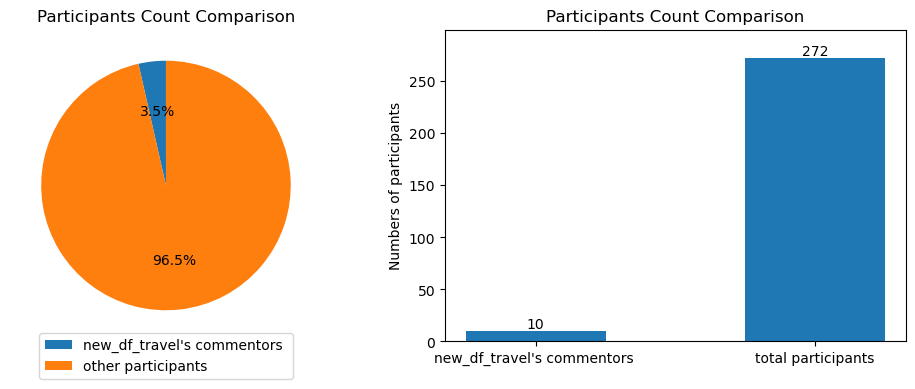

In [48]:
plot_observation_count_5(new_df_travel, df_1, "new_df_travel's commentors ")


In [49]:
new_df_identity = new_df[new_df['Recommendations'].str.contains('identity|Character|Distinctiveness|Unique', case=False)]
#new_df_identity 


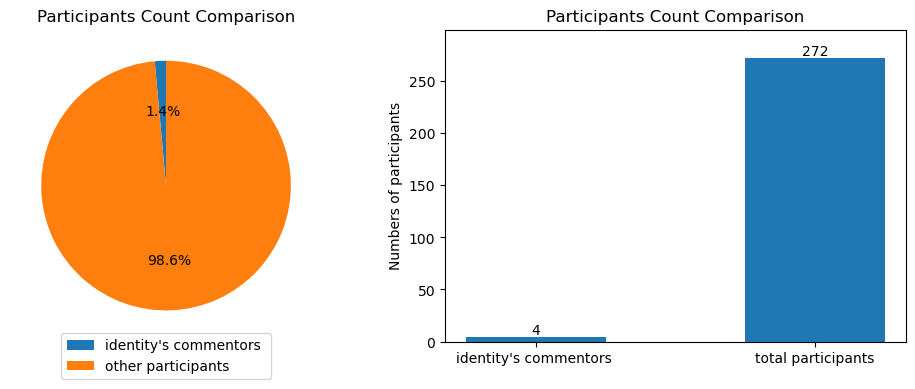

In [50]:
plot_observation_count_5(new_df_identity, df_1, "identity's commentors ")


In [51]:
new_df_offer = new_df[new_df['Recommendations'].str.contains('offer|Community|Services|Benefits|Support', case=False)]
#new_df_offer


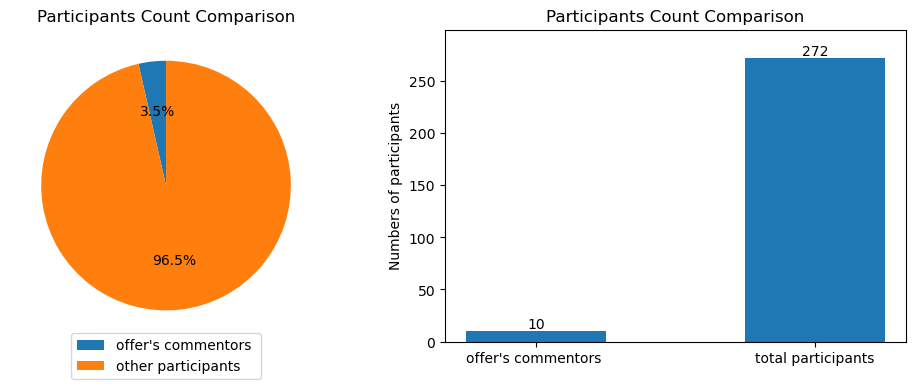

In [52]:
plot_observation_count_5(new_df_offer, df_1, "offer's commentors ")


In [53]:
new_df_connectivity = new_df[new_df['Recommendations'].str.contains('Network|Interconnectivity|Integration|Linkage|connectivity|connection|mobile', case=False)]
#new_df_connectivity


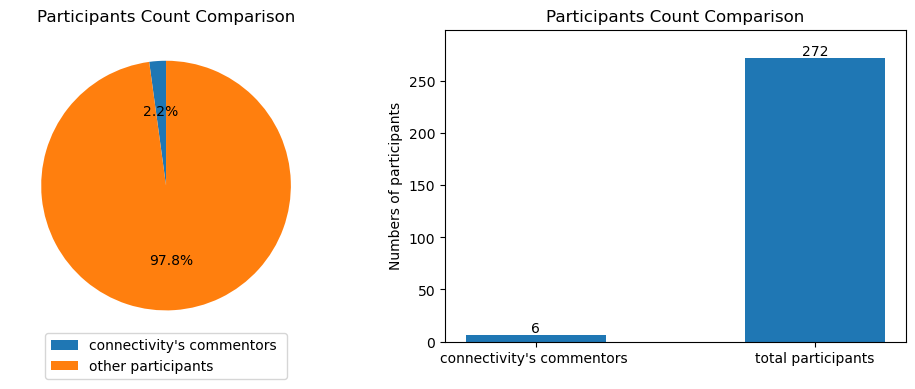

In [54]:
plot_observation_count_5(new_df_connectivity, df_1, "connectivity's commentors ")


## Below is a function which saves all dataframe of all topics to an excel file, 1 topic is in 1 sheet

In [55]:
# Create an Excel writer object
writer = pd.ExcelWriter('dataframes.xlsx') # you can change the name of Excel file 

# Dictionary of dataframes with sheet names
dataframes = {
# "red words" is names of sheet, black words is dataframe (content of sheets)
    'new_df_building_design': new_df_building_design,
    'new_df_heritage_culture': new_df_heritage_culture,
    'new_df_demolition': new_df_demolition,
    'new_df_library': new_df_library,
    'new_df_outdoor': new_df_outdoor,
    'new_df_facilities_accessibility': new_df_facilities_accessibility,
    'new_df_identity': new_df_identity,
    'new_df_connectivity': new_df_connectivity,
    'new_df_offer': new_df_offer,
    'new_df_travel': new_df_travel,
    'new_df_safety_maintenance': new_df_safety_maintenance,
    'new_df_parking': new_df_parking,
    'new_df_art_gallery': new_df_art_gallery,
    'new_df_museum': new_df_museum,
    'new_df_food_hall': new_df_food_hall
}

# Save each dataframe as a sheet in the Excel file
for sheet_name, df in dataframes.items():
    df.to_excel(writer, sheet_name=sheet_name, index=False)

# Save the Excel file
writer.save()


## The first bar chart is about numbers of recommendations by topics

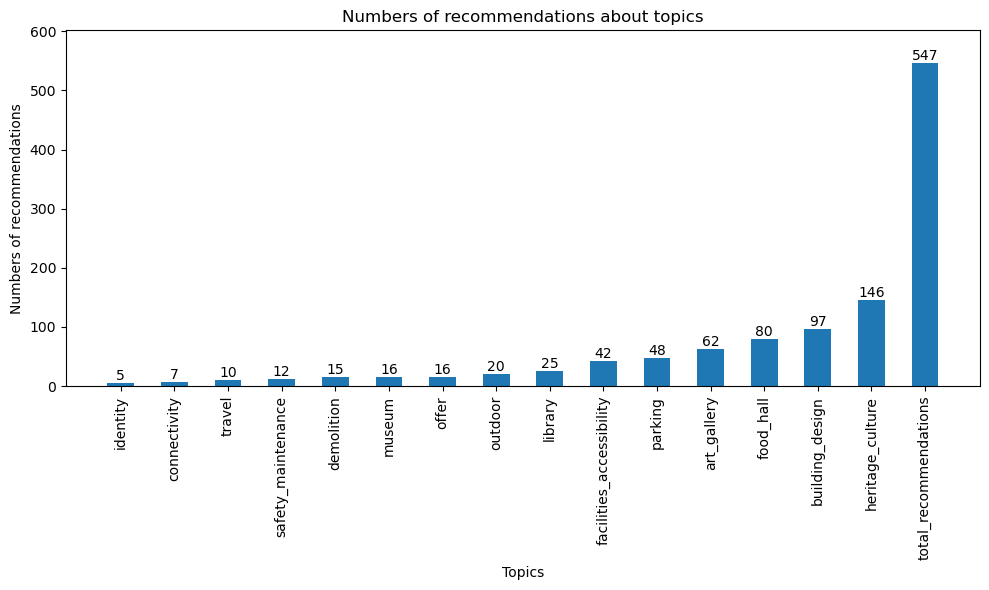

In [56]:
# Create a list of the dataframes
list_df_splited = [new_df_building_design, new_df_heritage_culture, new_df_demolition, new_df_library, new_df_outdoor, new_df_facilities_accessibility, new_df_identity, new_df_connectivity, new_df_offer, new_df_travel, new_df_safety_maintenance, new_df_parking, new_df_art_gallery, new_df_museum, new_df_food_hall, new_df]# Create a list of names for each dataframe
# Create a list of names for each dataframe
name_df_splited = ['building_design','heritage_culture','demolition','library','outdoor','facilities_accessibility','identity','connectivity','offer','travel','safety_maintenance','parking','art_gallery','museum','food_hall', 'total_recommendations']


# Call the function to plot the numbers of recommendations
plot_lengths_comments_6(list_df_splited, name_df_splited)


## The second bar chart is numbers of surveyor by topics

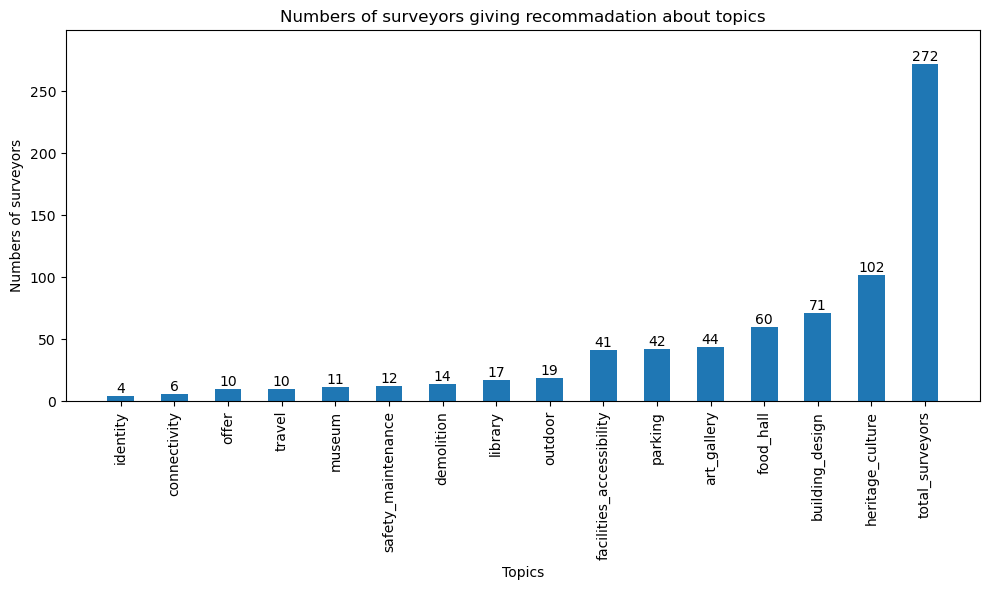

In [57]:
# Create a list of the dataframes
list_df = [new_df_building_design, new_df_heritage_culture, new_df_demolition, new_df_library, new_df_outdoor, new_df_facilities_accessibility, new_df_identity, new_df_connectivity, new_df_offer, new_df_travel, new_df_safety_maintenance, new_df_parking, new_df_art_gallery, new_df_museum, new_df_food_hall, df_1]
# Create a list of names for each dataframe
name_df = ['building_design','heritage_culture','demolition','library','outdoor','facilities_accessibility','identity','connectivity','offer','travel','safety_maintenance','parking','art_gallery','museum','food_hall', 'total_surveyors']


# Call the function to plot the numbers of surveyors
plot_numbers_surveyors_7(list_df, name_df)
